## Get Data

In [2]:
# check the datasets
# from helper_functions.unzip_file import unzip_file

# file_path = 'datas/titanic.zip'
# output_dir = 'datas/titanic'
# unzip_file(file_path, output_dir)

## Set up

In [14]:
# Importing the libraries
import pandas as pd
from IPython.display import display
from IPython.display import HTML
import base64 
# import pandas_profiling
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from IPython.display import FileLink, FileLinks
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [18]:
df_train = pd.read_csv("datas/titanic/train.csv")
display(df_train.head()) # displaying the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_test = pd.read_csv("datas/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

In [20]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

| 列名          | 含义                                 |
|--------------|--------------------------------------|
| PassengerId  | 乘客的唯一标识符                     |
| Survived     | 乘客是否幸存（0 = 未幸存，1 = 幸存） |
| Pclass       | 乘客所在的船舱等级（1 = 一等舱，2 = 二等舱，3 = 三等舱） |
| Name         | 乘客的姓名                           |
| Sex          | 乘客的性别                           |
| Age          | 乘客的年龄                           |
| SibSp        | 乘客在船上的兄弟姐妹和配偶的数量     |
| Parch        | 乘客在船上的父母和子女的数量         |
| Ticket       | 船票号码                             |
| Fare         | 乘客支付的船票费用                   |
| Cabin        | 乘客的船舱号码                       |
| Embarked     | 乘客登船的港口（C = Cherbourg，Q = Queenstown，S = Southampton） |

In [21]:
from helper_functions.info_df import info_df
info_df(df_train)

Number of rows: 891
Number of columns: 12

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

DataFrame description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.0000

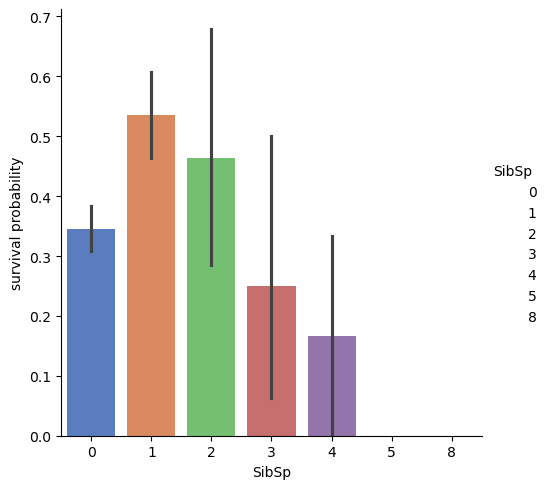

In [26]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp", y="Survived", data=df_train, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

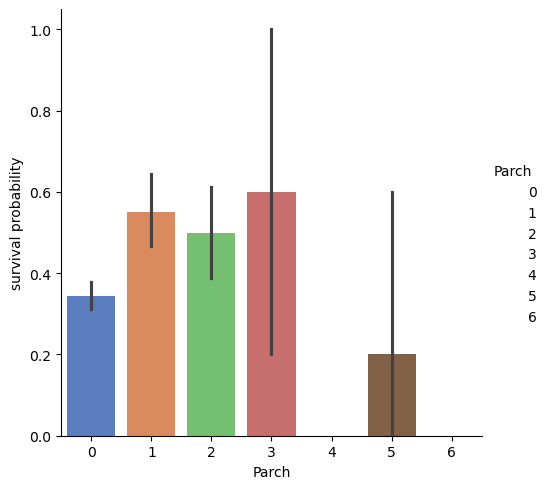

In [28]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch",y="Survived",data=df_train,kind="bar",palette="muted")
g = g.set_ylabels("survival probability")

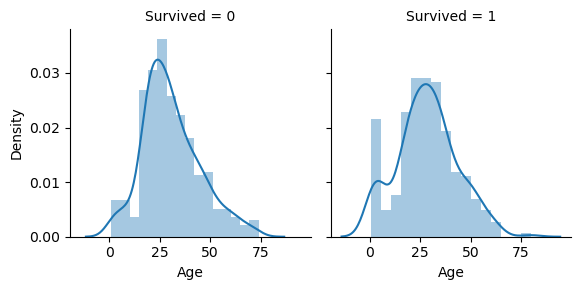

In [30]:
# Explore Age vs Survived
g = sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.distplot, "Age")

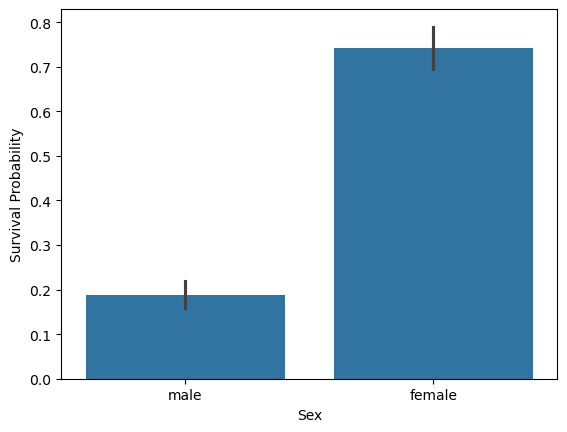

In [31]:
# Explore Sex vs Survived
g = sns.barplot(x="Sex",y="Survived",data=df_train)
g = g.set_ylabel("Survival Probability")

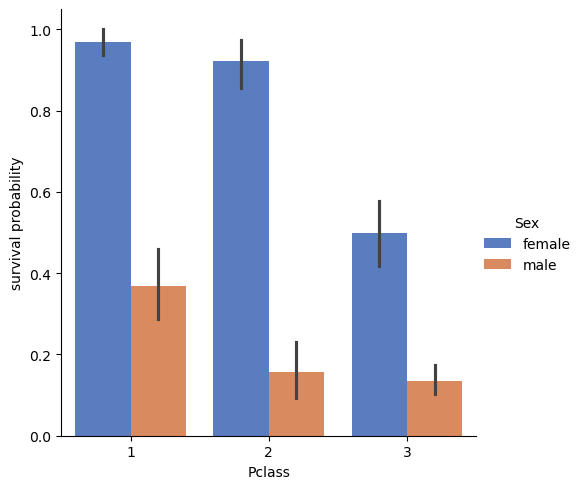

In [32]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df_train, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

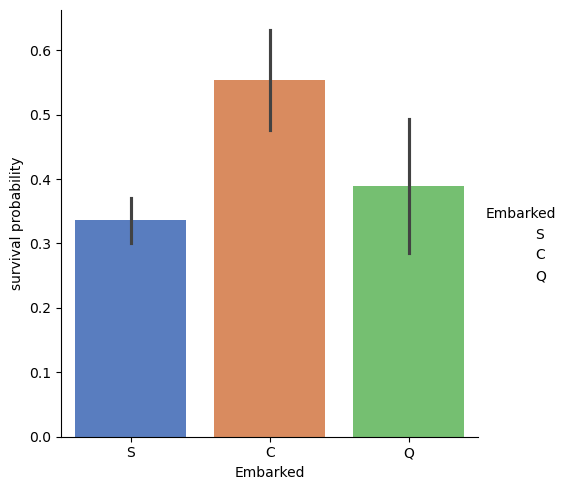

In [34]:
# Explore Embarked vs Survived 
g = sns.catplot(x="Embarked", y="Survived", data=df_train, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

<Axes: >

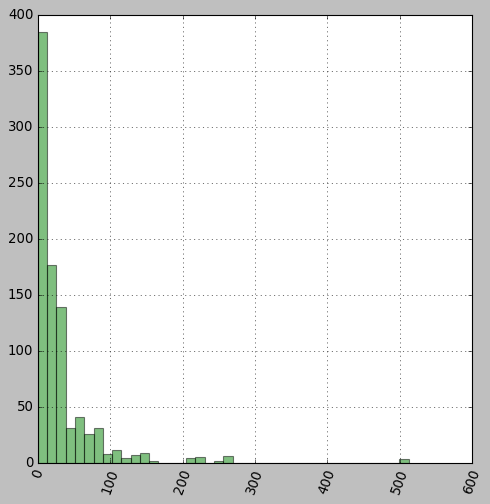

In [53]:
# plot histograms of fare
%matplotlib inline
plt.style.use('classic')
df_train['Fare'].hist(figsize=(7, 7), bins=40, xrot=70, color='green',alpha=0.5)

可以看出性别，仓位，年龄，家庭成员数量都对结果有影响。同时fare列需要进行对数变换。

## Missing Data

In [36]:
id_test = df_test["PassengerId"]
dataset =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True) # Joining the training and the test dataset
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [37]:
# Checking for missing values in the entire dataset and then dealing with the missing values
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [38]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [39]:
dataset = dataset.drop(["Cabin"], axis=1) # too many NaN to use
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median()) # Doing the median imputation for the Fare column
dataset["Embarked"] = dataset["Embarked"].fillna("S") # Doing the mode imputation for the Embarked column

In [41]:
# deal with missing age by impute the age with the median of same title
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True) # Using regular expression to extract the title
dataset['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [42]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
dataset.replace({'Title': mapping}, inplace=True)

In [43]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [44]:
# confirm that we are left with just six values
dataset['Title'].value_counts()

Title
Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: count, dtype: int64

In [45]:
# impute missing Age values using median of Title groups
title_ages = dict(dataset.groupby('Title')['Age'].median())

title_ages

{'Dr': 49.0, 'Master': 4.0, 'Miss': 22.0, 'Mr': 30.0, 'Mrs': 35.5, 'Rev': 41.5}

In [46]:
# create a column of the average ages
dataset['age_med'] = dataset['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
dataset['Age'].fillna(dataset['age_med'], inplace=True, )
del dataset['age_med']

In [47]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [49]:
dataset.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

## Feature Engineering

In [50]:
dataset.drop(["PassengerId", "Name"], inplace=True, axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [55]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1}) # Mapping the values to 0 and 1 for modelling
dataset["Family_Size"] = dataset["SibSp"] + dataset["Parch"] + 1 # Number of people in a family including the person himself
dataset = pd.get_dummies(dataset, columns = ["Title"]) # One hot encoding the Title column
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em") # One hot encoding the Embarked column
dataset["Pclass"] = dataset["Pclass"].astype("category") # Converting the PClass into category type
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc") # One hot encoding the Pclass column
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0) # Doing the log transformation on the skewed Fare column

In [56]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family_Size,Title_Dr,Title_Master,Title_Miss,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,0.0,0,22.0,1,0,1.981001,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1,38.0,1,0,4.266662,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1,26.0,0,0,2.070022,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,1.0,1,35.0,1,0,3.972177,2,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,0,35.0,0,0,2.085672,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Modeling

In [57]:
# Separate the dataset into training and testing dataset
train_len = len(df_train)
training_dataset = dataset[:train_len]

In [58]:
# Separate into testing dataset
testing_dataset = dataset[train_len:]
testing_dataset.drop(labels=["Survived"],axis = 1,inplace=True)

In [59]:
# Splitting the training dataset into datasets for training and testing the model
training_dataset["Survived"] = training_dataset["Survived"].astype(int)
X_train, X_test = train_test_split(training_dataset,test_size=0.3,random_state=42,stratify=training_dataset['Survived']) # stratify是指示分层抽样
y_train = X_train[["Survived"]]
y_test = X_test[["Survived"]]

In [60]:
# Support Vector Machine
model_svm=SVC(kernel='rbf',C=1,gamma=0.1)
model_svm.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction1=model_svm.predict(X_test.drop(["Survived"], axis=1))
print('Accuracy for rbf SVM is ', accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.8171641791044776


In [61]:
# Logistic Regression
model_lg = LogisticRegression(solver='liblinear')
model_lg.fit(X_train.drop(["Survived"], axis=1), y_train)
prediction3=model_lg.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Logistic Regression is',accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.8283582089552238


In [62]:
# Decision Tree Classifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction4=model_dt.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Decision Tree is', accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.7574626865671642


In [63]:
# K Nearest Neighbours Classifier
model_knn=KNeighborsClassifier() 
model_knn.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction5=model_knn.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the KNN is', accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.7723880597014925


In [64]:
# Gaussian Naive Bayes Classifier
model_gn=GaussianNB()
model_gn.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction6=model_gn.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the NaiveBayes is', accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.4216417910447761


In [65]:
# Random Forest Classifier
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction7=model_rf.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Random Forests is', accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.8171641791044776


In [78]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.4 MB/s eta 0:00:00a 0:00:01


## Cross Validation

In [66]:
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
mean_of_cross_validation = list()
accuracy = list()

std_of_cross_validation = list()
classifiers = [
    'Radial Svm', 
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'Naive Bayes', 
    'Random Forest'
]

models=[
    SVC(kernel='rbf'),
    LogisticRegression(solver="liblinear"),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

for model in tqdm(models):
    cv_result = cross_val_score(
        model, 
        training_dataset.drop(["Survived"], axis=1),
        training_dataset[["Survived"]], 
        cv=kfold, 
        scoring="accuracy"
    )
    mean_of_cross_validation.append(cv_result.mean())
    std_of_cross_validation.append(cv_result.std())
    accuracy.append(copy.deepcopy(cv_result))

new_models_dataframe=pd.DataFrame({'CV Mean':mean_of_cross_validation,'Std':std_of_cross_validation},index=classifiers)       
new_models_dataframe

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  3.20it/s]


,CV Mean,Std
Radial Svm,0.704794,0.054514
Logistic Regression,0.823845,0.043260
KNN,0.778926,0.027299
Decision Tree,0.787940,0.044128
Naive Bayes,0.445618,0.038137
Random Forest,0.819388,0.043434


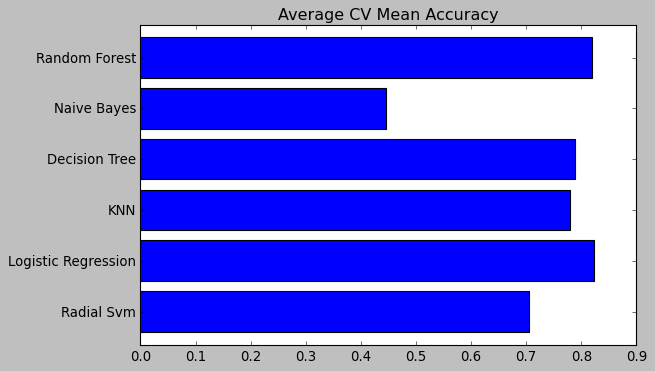

In [67]:
new_models_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

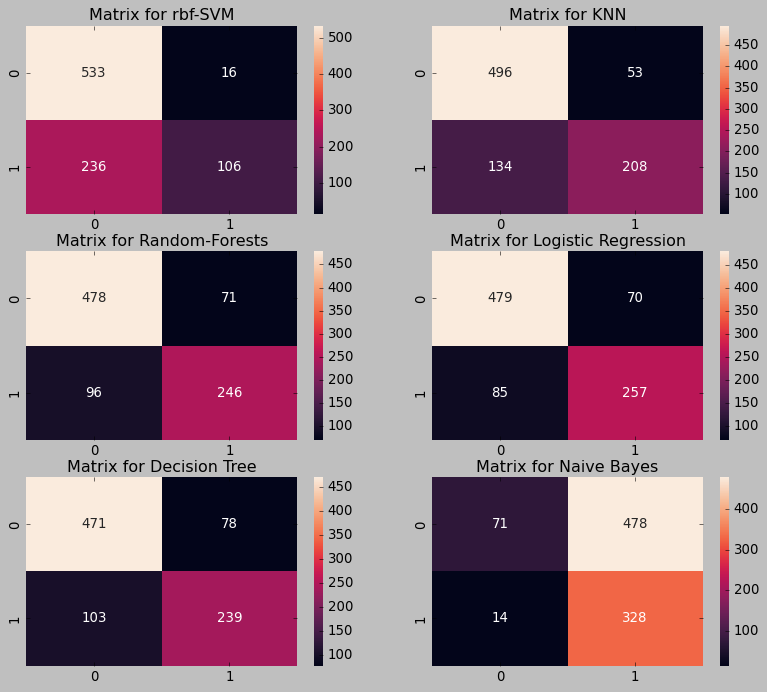

In [68]:
X = training_dataset.drop(["Survived"], axis=1)
Y = training_dataset[["Survived"]]

f,ax=plt.subplots(3,2,figsize=(12,10))

y_pred = cross_val_predict(SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(solver="liblinear"),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

可以看出SVM算法的表现最好。

## Hyper-parameter Optimization

In [69]:
# Possible Hyper-Parameter values for Support Vector Machines
C = [0.05, 0.1, 0.2,0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf','linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=1, gamma=0.1, kernel='linear')


In [70]:
# Possible Hyperparameters for Random Forest
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8125792480070302
RandomForestClassifier(n_estimators=400, random_state=42)


## Submission on Kaggle Competition

In [71]:
svm_predictions = model_svm.predict(testing_dataset) # Support Vector Machine
logistic_regression_predictions = model_lg.predict(testing_dataset) # Logistic Regression
random_forest_predictions = model_rf.predict(testing_dataset) # Random Forest

svm_submission = pd.DataFrame(
    {'PassengerId': id_test,
     'Survived': svm_predictions
    })

lg_submission = pd.DataFrame(
    {'PassengerId': id_test,
     'Survived': logistic_regression_predictions
    })
rf_submission = pd.DataFrame(
    {'PassengerId': id_test,
     'Survived': random_forest_predictions
    })

In [72]:
# Function to create the Download link to the Submissions
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [73]:
create_download_link(svm_submission, title="Download Support Vector Machine Submission", filename="svm_submission.csv")

In [74]:
create_download_link(lg_submission, title="Download Logistic Regression Submission", filename="lg_submission.csv")

In [75]:
create_download_link(rf_submission, title="Download Random Forest Submission", filename="rf_submission.csv")

## Results

- 逻辑回归：Score: 0.77272
- 随机森林：Score: 0.73684
- SVM：Score: 0.72009

最好的是逻辑回归，传统的统计分析还是很强的，但是估计大家都是用XGBoost预测的100%

## Try Others

In [90]:
# XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier(random_state=1,learning_rate=0.01, n_jobs=-1).fit(X_train.drop(["Survived"], axis=1),y_train)
prediction8 = clf.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the XGBoost is', accuracy_score(prediction8, y_test))

The accuracy of the XGBoost is 0.8246268656716418


In [91]:
xgboost_predictions = clf.predict(testing_dataset)
xgboost_submission = pd.DataFrame(
    {'PassengerId': id_test,
     'Survived': xgboost_predictions
    })

In [92]:
create_download_link(xgboost_submission, title="Download Xgboost Submission", filename="xgb_submission.csv")

只有0.74看来还是要学习一下kaggle网友了。